In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

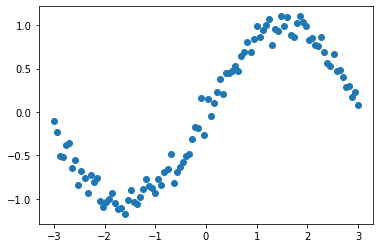

In [2]:
f = lambda x, a, b, phi: a * torch.sin(b * x + phi)
a = 1
b = 1
phi = 0

x = torch.linspace(-3, 3, 100).unsqueeze(1)
y = f(x, a, b, phi) + 0.1 * torch.randn(100, 1)

plt.scatter(x, y)

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(1, 20)
        self.l2 = nn.Linear(20, 1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.l1(x))
        return self.l2(x)

In [4]:
LR = 1e-3
N_EPOCHS = 1000

model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [5]:
for i in range(N_EPOCHS):
    optimizer.zero_grad()
    
    y_hat = model(x)
    loss = F.mse_loss(y, y_hat)
    
    loss.backward()
    optimizer.step()

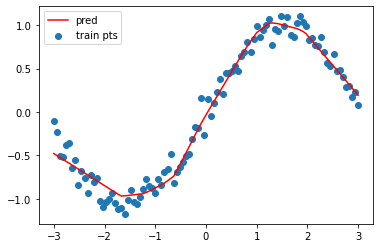

In [6]:
with torch.no_grad():
    y_hat = model(x)
plt.scatter(x, y, label='train pts')
plt.plot(x, y_hat, color='r', label='pred')
plt.legend()